In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

/Users/martevingsnes/Machine-learning-066/.venv/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: generate_datasets.ipynb
  File: generate_dataset_hgb.ipynb
  File: generate_dataset_gradboost.ipynb


In [3]:
# pv_measurement for all training and validation rows
a_targets = pd.read_parquet('../data/A/train_targets.parquet')
b_targets = pd.read_parquet('../data/B/train_targets.parquet')
c_targets = pd.read_parquet('../data/C/train_targets.parquet')

# validation sets
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')

# training sets
X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')

#test sets
X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')

### Groups the rows with the same hour for location A

In [4]:
df = X_test_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_A = df


df = X_train_observed_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_A = df


df = X_train_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_A = df

### Groups the rows with the same hour for location B

In [5]:
df = X_test_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_B = df


df = X_train_observed_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_B = df


df = X_train_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_B = df

### Groups the rows with the same hour for location C

In [6]:
df = X_test_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_C = df


df = X_train_observed_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_C = df


df = X_train_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_C = df

#### Merging the training and validation set with the targets sets such that pv_measurement is added

In [7]:
training_A = training_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_A.drop('time', axis=1, inplace=True)

training_B = training_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_B.drop('time', axis=1, inplace=True)

training_C = training_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_C.drop('time', axis=1, inplace=True)

validation_A = validation_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_A.drop('time', axis=1, inplace=True)

validation_B = validation_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_B.drop('time', axis=1, inplace=True)

validation_C = validation_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_C.drop('time', axis=1, inplace=True)

Training B har 4 nan's for pv_m. Training C har 6000 nan's for pv_m

In [8]:
training_A['pv_measurement'] = training_A['pv_measurement'].replace(-0.0, 0.0)
training_B['pv_measurement'] = training_B['pv_measurement'].replace(-0.0, 0.0)
training_C['pv_measurement'] = training_C['pv_measurement'].replace(-0.0, 0.0)
validation_C['pv_measurement'] = validation_C['pv_measurement'].replace(-0.0, 0.0)
validation_A['pv_measurement'] = validation_A['pv_measurement'].replace(-0.0, 0.0)
validation_B['pv_measurement'] = validation_B['pv_measurement'].replace(-0.0, 0.0)

#### Plotting pv_measurement for all dataframes

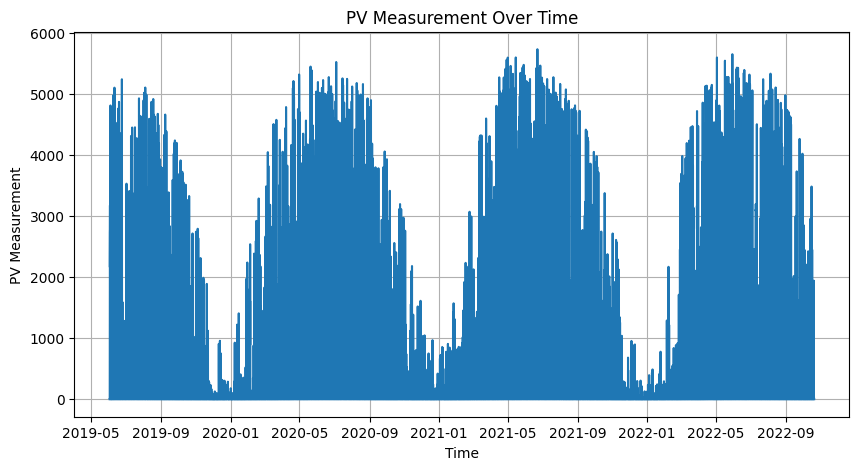

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(training_A['date_forecast'], training_A['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

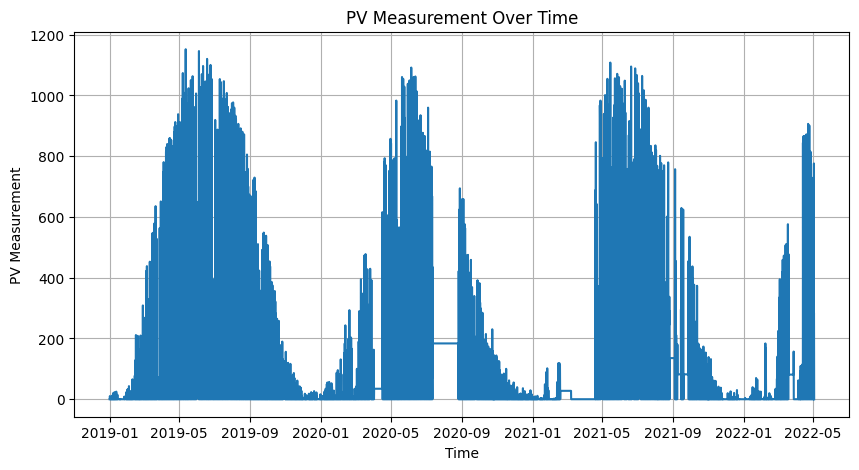

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(training_B['date_forecast'], training_B['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

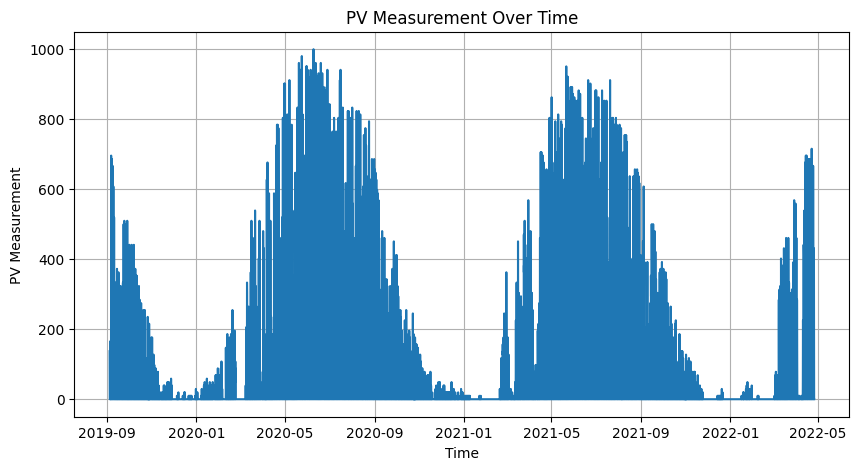

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(training_C['date_forecast'], training_C['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

Her må vi sette inn verdier for 2019; gjennomsnitt av andre år med samme dato ellers

In [12]:
#training_C['pv_measurement'].fillna(1000, inplace=True)

In [13]:
training_C.dropna(subset=['pv_measurement'], inplace=True)
training_B.dropna(subset=['pv_measurement'], inplace=True)

In [14]:
nan_count = training_A.isna().sum()
#print(nan_count)

dataframes = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

# Iterate through the DataFrames and remove the 'snow_density:kgm3' column
for df in dataframes:
    if 'snow_density:kgm3' in df.columns:
        df.drop(columns=['snow_density:kgm3'], inplace=True)
        df.drop(columns=['ceiling_height_agl:m'], inplace=True)
        df.drop(columns=['cloud_base_agl:m'], inplace=True)

### Trains HGB model for each location

### A

In [15]:
y_train = training_A['pv_measurement']

X_train = training_A.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_A['pv_measurement']

X_validate = validation_A.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [16]:
hgb_regressor_A = HistGradientBoostingRegressor()

# Train the model
hgb_regressor_A.fit(X_train, y_train)

# Make predictions on the test set
y_pred = hgb_regressor_A.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 123.89


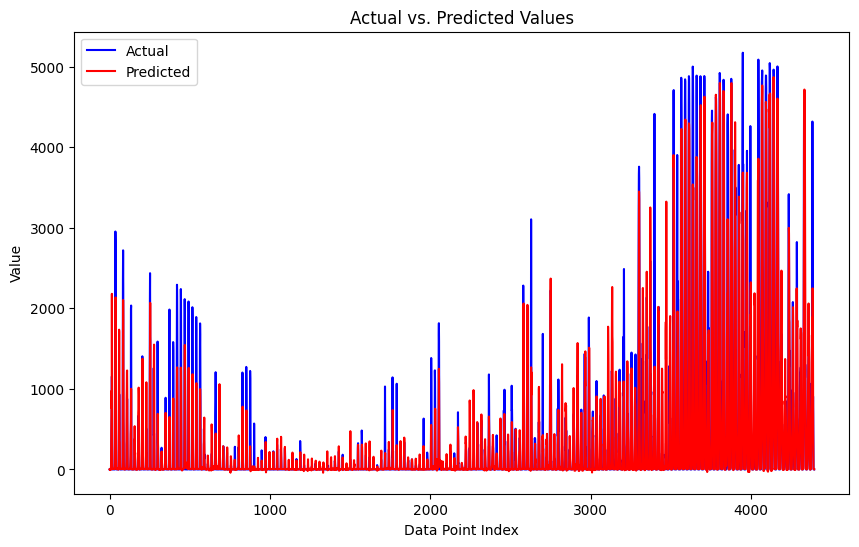

In [17]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

#### B

In [18]:
y_train = training_B['pv_measurement']

X_train = training_B.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_B['pv_measurement']

X_validate = validation_B.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [19]:
hgb_regressor_B = HistGradientBoostingRegressor()

# Train the model
hgb_regressor_B.fit(X_train, y_train)

# Make predictions on the test set
y_pred = hgb_regressor_B.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 21.64


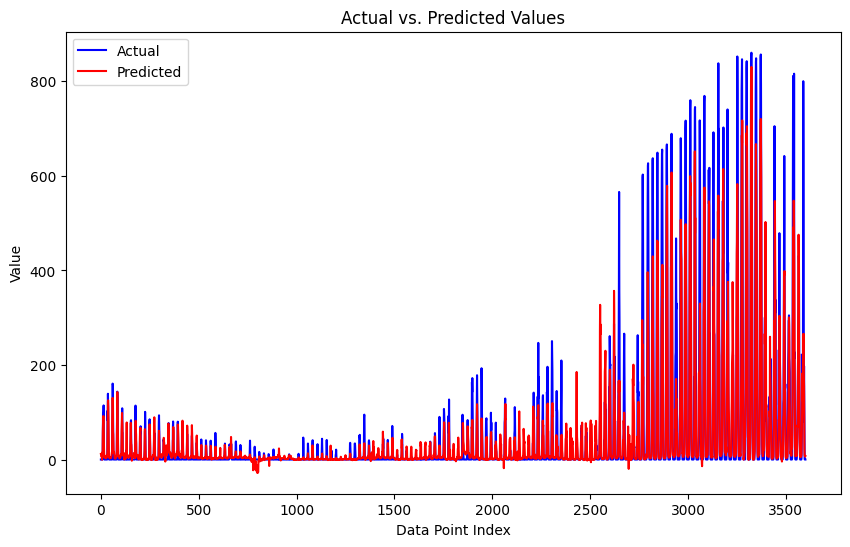

In [20]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

#### C

In [21]:
y_train = training_C['pv_measurement']

X_train = training_C.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_C['pv_measurement']

X_validate = validation_C.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [22]:
hgb_regressor_C = HistGradientBoostingRegressor()

# Train the model
hgb_regressor_C.fit(X_train, y_train)

# Make predictions on the test set
y_pred = hgb_regressor_C.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 21.87


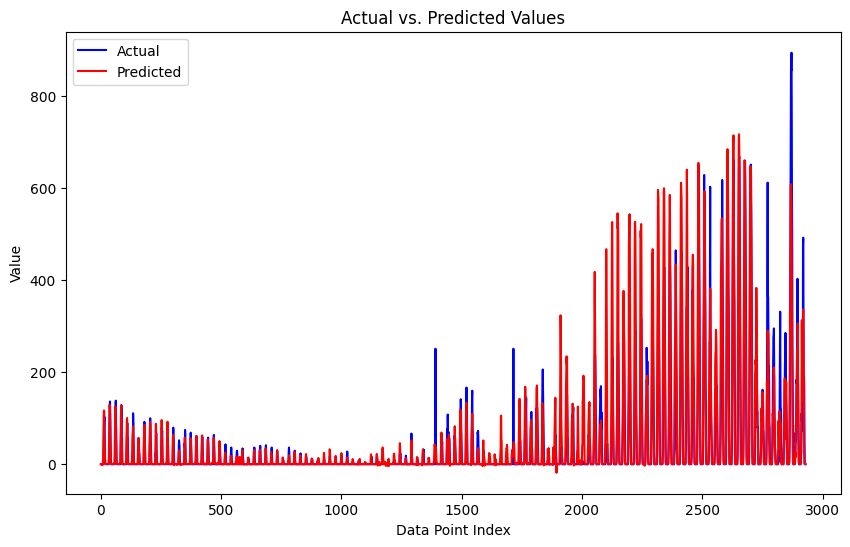

In [23]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

### Testing

In [24]:
combined_A = pd.concat([training_A, validation_A], axis=0, ignore_index=True)
combined_A.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_A['pv_measurement']

X_train = combined_A.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_A = test_A.drop(columns=['date_forecast'])
test_A = test_A.drop(columns=['date_calc'])

hgb_regressor_A2 = HistGradientBoostingRegressor()

# Train the model
hgb_regressor_A2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_A = hgb_regressor_A2.predict(test_A)

In [25]:
combined_B = pd.concat([training_B, validation_B], axis=0, ignore_index=True)
combined_B.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_B['pv_measurement']

X_train = combined_B.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_B = test_B.drop(columns=['date_calc'])
test_B = test_B.drop(columns=['date_forecast'])

hgb_regressor_B2 = HistGradientBoostingRegressor()

# Train the model
hgb_regressor_B2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_B = hgb_regressor_B2.predict(test_B)

In [26]:
combined_C = pd.concat([training_C, validation_C], axis=0, ignore_index=True)
combined_C.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_C['pv_measurement']

X_train = combined_C.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_C = test_C.drop(columns=['date_calc'])
test_C = test_C.drop(columns=['date_forecast'])

hgb_regressor_A = HistGradientBoostingRegressor()

# Train the model
hgb_regressor_A.fit(X_train, y_train)

# Make predictions on the test set
y_pred_C = hgb_regressor_A.predict(test_C)

In [27]:
test_pred_all = np.concatenate((y_pred_A, y_pred_B, y_pred_C), axis=0)

test_pred_all2 = np.where(test_pred_all < 0, 0, test_pred_all)

In [28]:
test3 = pd.read_csv('../test.csv')
sample_submission = pd.read_csv('../sample_submission.csv')
test3['prediction'] = test_pred_all2
sample_submission = sample_submission[['id']].merge(test3[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('../Submissions/submission_28.csv', index=False)